In [2]:
#https://www.kdnuggets.com/2017/08/comparing-distance-measurements-python-scipy.html
#https://www.programmersought.com/article/84635427778/
import scipy.spatial.distance as dist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [11]:
# Prepare 2 vectors (data points) of 10 dimensions
A = np.random.uniform(0, 10, 10)
B = np.random.uniform(0, 10, 10)

#https://www.youtube.com/watch?v=3IdvoI8O9hU&feature=youtu.be
A = [75.0, 52.8, 64.8, 43.2, 84.00, 49.2]
B = [19.6, 20.8, 17.2, 20.4, 17.60, 17.6]

A = [1,2,3,4]
B = [1,5,3,7]


A = np.asarray(A)
B = np.asarray(B)


In [12]:
print('\n2 10-dimensional vectors')
print('------------------------')
print(A)
print(B)


2 10-dimensional vectors
------------------------
[1 2 3 4]
[1 5 3 7]


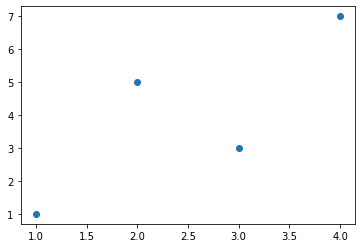

In [13]:
plt.scatter(A,B)

In [14]:
def distEuclid(x, y, squared=True):
    if squared:
        distance= np.sum(np.square(x-y))
    else:
        distance= np.sqrt(np.sum(np.square(x-y)))
    return distance
def distManhatten(x, y):
    distance = sum(abs(x-y))
    return distance
def distCosine(x, y):
    return 1-cosine_similarity(x,y)
def cosine_similarity(x, y):
    a = y.dot(x.T)
    b = np.sqrt(np.sum(x**2) * np.sum(y**2))      
    similarity = a / b      
    return similarity

In [15]:
print('\nDistance measurements with 10-dimensional vectors')
print( '-------------------------------------------------')
print( '\nEuclidean distance is',distEuclid(A, B,squared=True))
print( 'Manhattan distance is', distManhatten(A, B))
print( 'Cosine distance is', distCosine(A, B))


Distance measurements with 10-dimensional vectors
-------------------------------------------------

Euclidean distance is 18
Manhattan distance is 6
Cosine distance is 0.04381711253248499


In [16]:
# Perform distance measurements 
print('\nDistance measurements with 10-dimensional vectors')
print( '-------------------------------------------------')
print( '\nEuclidean distance is', dist.euclidean(A, B))
print( 'Manhattan distance is', dist.cityblock(A, B))
print( 'Chebyshev distance is', dist.chebyshev(A, B))
print( 'Canberra distance is', dist.canberra(A, B))
print( 'Cosine distance is', dist.cosine(A, B))
#dist.mahalanobis(A,B)


Distance measurements with 10-dimensional vectors
-------------------------------------------------

Euclidean distance is 4.242640687119285
Manhattan distance is 6
Chebyshev distance is 3
Canberra distance is 0.7012987012987013
Cosine distance is 0.04381711253248499


(1, 0, 0) (1, 0, 0) 0.00
(1, 0, 0) (2, 0, 0) 1.00
(1, 0, 0) (3, 4, 0) 4.47
(1, 0, 0) (3, 6, 3) 7.00
(2, 0, 0) (1, 0, 0) 1.00
(2, 0, 0) (2, 0, 0) 0.00
(2, 0, 0) (3, 4, 0) 4.12
(2, 0, 0) (3, 6, 3) 6.78
(3, 4, 0) (1, 0, 0) 4.47
(3, 4, 0) (2, 0, 0) 4.12
(3, 4, 0) (3, 4, 0) 0.00
(3, 4, 0) (3, 6, 3) 3.61
(3, 6, 3) (1, 0, 0) 7.00
(3, 6, 3) (2, 0, 0) 6.78
(3, 6, 3) (3, 4, 0) 3.61
(3, 6, 3) (3, 6, 3) 0.00


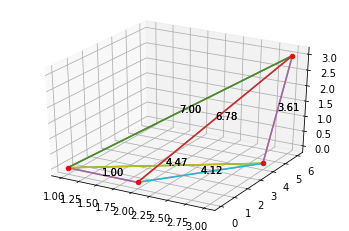

In [17]:
#https://stackoverflow.com/questions/52911890/labeling-distance-between-points-on-python-plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot points
a, b, c1, c2, z1, z2, z3 = 1, 2, 3, 4, 3, 6, 3
pts = [(a,0,0),(b,0,0),(c1,c2,0),(z1,z2,z3)]
for p in pts:
    ax.scatter(p[0], p[1], p[2], zdir='z', c='r')

# Plot tetrahedron
for a, b in itertools.product(pts, pts):
    x = np.linspace(a[0], b[0], 100)
    y = np.linspace(a[1], b[1], 100)
    z = np.linspace(a[2], b[2], 100)
    d = np.sqrt( sum([(a[i]-b[i])**2 for i in (0, 1, 2)]) )
    #d = distEuclid([a[i],b[i] for i in (0, 1, 2)] )
    s = "%.2f" % d
    m = [(a[i]+b[i])/2. for i in (0, 1, 2)]
    ax.plot(x, y, z)
    if d>0:
        ax.text(m[0], m[1], m[2], s)
    print(a, b, s)

plt.show()

## Distância de Mahalanobis - step by step

In [74]:
#data = np.array([
#    [1,100,10],
#    [2,300,15],
#    [4,200,20],
#    [2,600,10],
#    [5,100,30]
#])
dataC = np.array([
    [0.5,1.0],
    [1.0,1.5],
    [1.5,1.0],
    [1.0,0.5],
    [1.0,1.0]
])
dataE = np.array([
    [3.0,2.0],
    [3.75,2.25],
    [4.5,2.25],
    [4.5,2.5],
    [4.5,2.75],
    [5.25,2.75],
    [6.0,3.0]
])

dataProva = np.array([
    [0.5,1.0],
    [1.0,1.5],
    [1.5,1.0],
    [1.0,0.5]
    
])


x = np.array([[2.0,1.5]])

data = dataProva

x_minus_mu = x - np.mean(data,axis=0)
print("diferença do ponto e a média xMedia: ", x_minus_mu)

diferença do ponto e a média xMedia:  [[1.  0.5]]


In [75]:
cov = np.cov(data.T,bias=True)
#cov = np.array([
#    [1.0,0],
#    [0,1.0]
#])
cov


array([[0.125, 0.   ],
       [0.   , 0.125]])

In [71]:
inv_covmat = np.linalg.inv(cov)
#inv_covmat = np.array([[10.0,0],
#                           [0,10.0]])
#inv_covmat = np.array([[7.0,-17.0],
#                           [-17.0,50.0]])

print("Inv da matriz de covariância dos dados: ", inv_covmat)

Inv da matriz de covariância dos dados:  [[1. 0.]
 [0. 1.]]


In [67]:
left_term = np.dot(x_minus_mu, inv_covmat)
print("Matriz normalizada x inversa: ", left_term)

Matriz normalizada x inversa:  [[1.  0.5]]


In [68]:
mahal = np.dot(left_term, x_minus_mu.T)
print("Distancia s: ", mahal)

Distancia s:  [[1.25]]


In [69]:
print(mahal.diagonal())

[1.25]


## Mahalanobis
https://www.machinelearningplus.com/statistics/mahalanobis-distance/
https://www.statology.org/mahalanobis-distance-python/#:~:text=The%20Mahalanobis%20distance%20is%20the,analyses%20that%20involve%20several%20variables.

In [24]:
def myMahalanobis(x=None, data=None, cov=None):
    """Calcula a distancia de Mahalanobis entre cada linha do vetor x e um dataset  
    x    : vetor ou matriz, com p colunas.
    data : ndarray da distribuição no qual a distancia de Mahalanobis para observação x será calculada.
    cov  : matriz de covariancia (p x p) da distribuição. Se não informada, calcula.
    """
    x_minus_mu = x - np.mean(data,axis=0)
    if not cov:
        cov = np.cov(data.T,bias=True)
    inv_covmat = np.linalg.inv(cov)
    #inv_covmat = np.array([[10.0,0],
    #                       [0,10.0]])
    #inv_covmat = np.array([[7.0,-17.0],
    #                       [-17.0,50.0]])
    
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)

    return mahal.diagonal()

In [25]:
dataE = np.array([
    [3.0,2.0],
    [3.75,2.25],
    [4.5,2.25],
    [4.5,2.5],
    [4.5,2.75],
    [5.25,2.75],
    [6.0,3.0]
])

dataC = np.array([
    [0.5,1.0],
    [1.0,1.5],
    [1.5,1.0],
    [1.0,0.5],
    [1.0,1.0]
])

x = np.array([[2.0,1.0]])
myMahalanobis(x=x, data=dataE)

array([32.66666667])

In [26]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv'
df = pd.read_csv(filepath).iloc[:, [0,4,6]]
df.head()

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335


In [27]:
df_x = df[['carat', 'depth', 'price']].head(500)
df_x['mahala'] = myMahalanobis(x=df_x, data=df[['carat', 'depth', 'price']])
df_x.head()

,carat,depth,price,mahala
0,0.23,61.5,326,1.709892
1,0.21,59.8,326,3.540163
2,0.23,56.9,327,12.715257
3,0.29,62.4,334,1.454496
4,0.31,63.3,335,2.347283


## Reference
https://www.youtube.com/watch?v=4buOoXp7AyI

https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot

## Forma geométrica das distancias

In [28]:
import numpy as np  
import matplotlib.pyplot as plt  
def graph(formula, x_range):  
    #x = np.array(x_range)  
    x = x_range
    y = eval(formula)
    #y = np.sqrt(-x**2+r**2)
    
    plt.plot(x, y,'b')
    plt.plot(x,-y,'b')
    plt.gca().set_aspect('equal')
    plt.show()
    #plt.plot(x, y)  
    #plt.show()

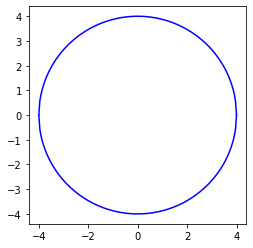

In [29]:
#graph('pow((pow(4,1)-pow(x,1)),1/1)', np.linspace(-4,4,200)) #- distancia Manhatan (distancia fixa = 4)
graph('pow((pow(4,2)-pow(x,2)),1/2)', np.linspace(-4,4,200)) #- distancia euclidiana (distancia fixa = 4)
#graph('pow((pow(4,100)-pow(x,100)),1/100)', np.linspace(-4,4,200)) #- distancia Suprema (distancia fixa = 4)
#np.array(range(-4,5))

In [59]:
A = [1,2,3,4]
B = [1,5,3,7]
A = np.asarray(A)
B = np.asarray(B)

A-B
pow(A-B,100)
np.sum(pow(A-B,5001))
pow(np.sum(pow(A-B,5001)),1/5001)





1.004131740993506

In [57]:
np.sqrt(np.sum(np.square(A-B)))

4.242640687119285

In [ ]:
def distEuclid(x, y, squared=True):
    if squared:
        distance= np.sum(np.square(x-y))
    else:
        distance= np.sqrt(np.sum(np.square(x-y)))
    return distance

## Slide 24 - distancia euclidiana de x1 e x2

In [28]:
A = [1, 2, 5, 803]
B = [1, 1, 5, 712]
A = np.asarray(A)
B = np.asarray(B)
distEuclid(A,B)

91.00549433962765

## slide 26 - normalização

In [33]:
def minMaxNormalization(x):
    return (x - np.min(x))/(np.max(x) - np.min(x))

def ZNormalization(x):
    media = np.mean(x,axis=0)
    desvio = np.sum((x-media)**2) / len(x)
    desvio = np.sqrt(desvio)
    return (x - media) / desvio

In [42]:
A = [1.55, 1.70, 1.8]
A = np.asarray(A)
normalized = minMaxNormalization(A)
normalized

array([0. , 0.6, 1. ])

In [47]:
normalized = minMaxNormalization(B)
normalized

array([0.        , 0.        , 0.00562588, 1.        ])

## slide 32 Distancia Valores Ausentes

In [44]:
def normalizedEuclidDist(x,y, raiz = True):
    N = 0
    distance = 0
    for i in range(len(x)):
        if(x[i] is not None and y[i] is not None):
            distance += np.square(x[i]-y[i])
            N +=1
    if raiz:        
        return np.sqrt( distance/N)
    else:
        return distance/N

In [48]:
X1 = [2, -1, None,0]
X2 = [7, 0, -4, 8]
X3 = [None, 3, 5,2]
X4 = [None, 10, None,5]

X1 = np.asarray(X1)
X2 = np.asarray(X2)
X3 = np.asarray(X3)
X4 = np.asarray(X4)

print( '\nDistância euclidiana (c raiz) normalizada: ',normalizedEuclidDist(X1,X3,raiz = False))
print( '\nDistância euclidiana (s raiz) normalizada: ',normalizedEuclidDist(X1,X3,raiz = True))


Distância euclidiana (c raiz) normalizada:  10.0

Distância euclidiana (s raiz) normalizada:  3.1622776601683795


## Correlação de Pearson

In [49]:
from scipy import stats
A = [0.8009,0.8116,0.8222,0.8228,0.8243,0.8303,0.8381,0.8411,0.8446,0.8475]
B = [0.6000,0.6128,0.6255,0.6262,0.6280,0.6352,0.6446,0.6482,0.6523,0.6558]
C = [0.6558,0.6128,0.6255,0.6262,0.6280,0.6352,0.6446,0.6482,0.6523,0.6000]

(0.9999986021725538, 1.670288854329186e-23)

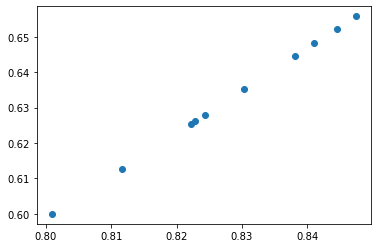

In [50]:
plt.scatter(A,B)
stats.pearsonr(A,B)

(-0.07907245177578456, 0.8281064535008387)

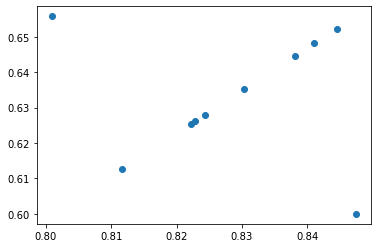

In [51]:
plt.scatter(A,C)
stats.pearsonr(A,C)

In [52]:
def variance(data, ddof=0):
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data) / (n - ddof)

In [53]:
def stdev(data):
    var = variance(data)
    std_dev = np.sqrt(var)
    return std_dev

In [54]:
def pearson(x,y):
    rôX= stdev(x)
    rôY= stdev(y)
    miX = x - np.mean(x,axis=0)
    miY = y - np.mean(y,axis=0)
    p = miX / rôX
    q = miY / rôY
    pearson = np.dot(p, q) / len(x)
    return pearson

In [55]:
pearson(A,B)

0.9999986021725537

In [56]:
pearson(A,C)

-0.07907245177578463

 ## slide 48 - Correlação de Pearson
 ref: https://www.youtube.com/watch?v=qqRUsY2Fu0A&t=1046s

In [57]:
from scipy import stats
A = [1,-3,0,4,1,0,3]
B = [0,1,4,-2,3,-1,4]

-0.11233643359579602

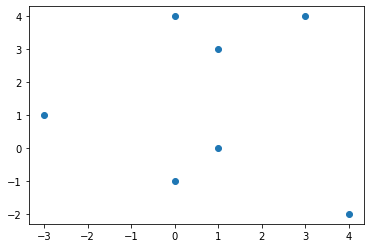

In [58]:
plt.scatter(A,B)
pearson(A,B)

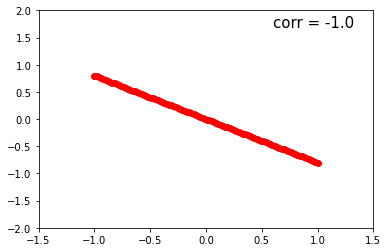

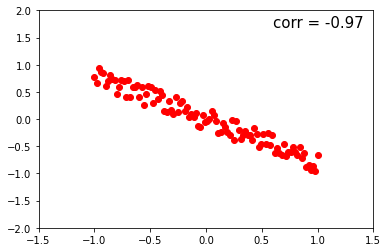

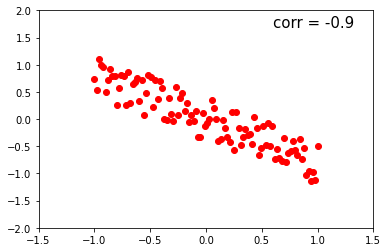

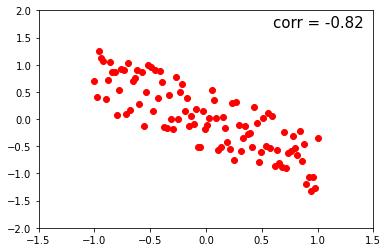

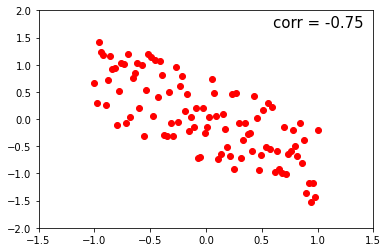

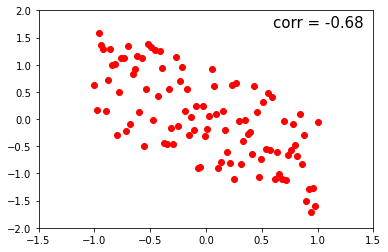

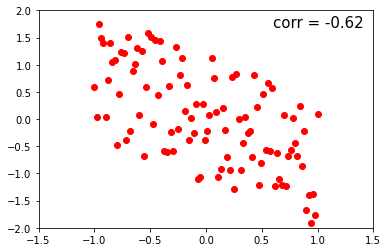

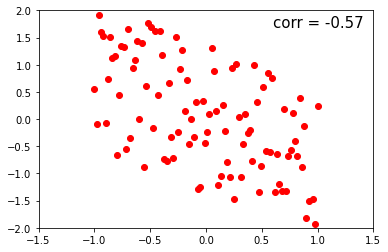

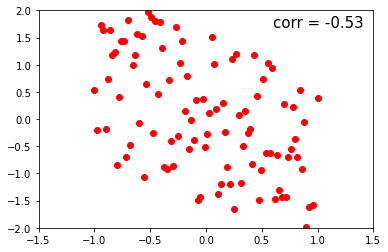

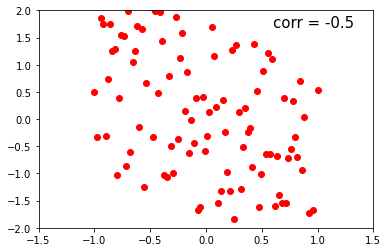

In [59]:
N = 100
X  = np.linspace(-1,1,N)
erro = np.random.uniform(-1,1,N) #ruido a ser incluso na função linear
for sigma in np.arange(0,2,0.2):
    Y = -0.8 * X + erro*sigma
    plt.plot(X,Y,'ro')
    corr, p_value = stats.pearsonr(X,Y) #calcula correlacao
    corr = int(corr*100)/100
    string = 'corr = ' + str(corr)
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,2)
    plt.text(0.6,1.7,string,fontsize=15)
    plt.show(True)

## Similaridade Cosseno

NameError: name 'pearson' is not defined

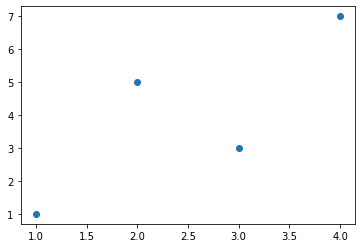

In [30]:
A = [3,2,0,5,0,0,0,2,0,0]
B = [1,0,0,0,0,0,0,1,0,2]
A = [1,2,3,4]
B = [1,5,3,7]
plt.scatter(A,B)
pearson(A,B)

In [31]:
produto = np.dot(A,B)

In [32]:
normA = np.linalg.norm(A)
normB = np.linalg.norm(B)

In [33]:
cosseno = produto / (normA * normB)

In [34]:
cosseno

0.956182887467515

In [35]:
p = [1, 0, 0, 4, 1, 0, 0, 3]
q = [0, 5, 0, 2, 3, 1, 0, 4]
p = [1,2,3,4]
q = [1,5,3,7]
normA = np.linalg.norm(p)
normB = np.linalg.norm(q)

In [36]:
produto = np.dot(p,q)
cosseno = produto / (normA * normB)

In [37]:
print(str(cosseno) + ' dissimilaridade ' + str(1-cosseno))

0.956182887467515 dissimilaridade 0.04381711253248499


## Método de Gower
https://medium.com/analytics-vidhya/concept-of-gowers-distance-and-it-s-application-using-python-b08cf6139ac2
https://datascience.stackexchange.com/questions/8681/clustering-for-mixed-numeric-and-nominal-discrete-data

In [65]:
from sklearn.neighbors import DistanceMetric

In [74]:
df = pd.DataFrame([[1,2.6,'A'],[12,5,'X'],[4,7,'A'],[4,7,None]])
df.columns = ['Num_1','Num_2','Cat_1']

In [75]:
#Similiraty #1 of 3, based on Num_1
s1 = DistanceMetric.get_metric('manhattan').pairwise(df[['Num_1']])
s1

array([[ 0., 11.,  3.,  3.],
       [11.,  0.,  8.,  8.],
       [ 3.,  8.,  0.,  0.],
       [ 3.,  8.,  0.,  0.]])

In [76]:
# normalizing the matrix by dividing with the highest values
s1 = s1/max(np.ptp(df['Num_1']),1)
s1

array([[0.        , 1.        , 0.27272727, 0.27272727],
       [1.        , 0.        , 0.72727273, 0.72727273],
       [0.27272727, 0.72727273, 0.        , 0.        ],
       [0.27272727, 0.72727273, 0.        , 0.        ]])

In [77]:
#performing both the step at the same time
s2 = DistanceMetric.get_metric('manhattan').pairwise(df[['Num_2']])/max(np.ptp(df['Num_2']),1)
s2

array([[0.        , 0.54545455, 1.        , 1.        ],
       [0.54545455, 0.        , 0.45454545, 0.45454545],
       [1.        , 0.45454545, 0.        , 0.        ],
       [1.        , 0.45454545, 0.        , 0.        ]])

In [78]:
#To s3, we first need to convert the categorical values in to dummy variables and then apply dice distance.
#dicedistance in short: whenever the values are equal , DiceDistance = 0
#s3 = DistanceMetric.get_metric('dice').pairwise(df[['Cat_1']])
s3 = DistanceMetric.get_metric('dice').pairwise(pd.get_dummies(df[['Cat_1']]))
s3

array([[ 0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  1.],
       [ 0.,  1.,  0.,  1.],
       [ 1.,  1.,  1., nan]])

In [79]:
#And with we have all the values. s1,s2 and s3 as calculated and 
w1 = w2 = w3 = 1.

In [80]:
Gowers_Distance = (s1*w1 + s2*w2 + s3*w3)/(w1 + w2 + w3) 
Gowers_Distance

array([[0.        , 0.84848485, 0.42424242, 0.75757576],
       [0.84848485, 0.        , 0.72727273, 0.72727273],
       [0.42424242, 0.72727273, 0.        , 0.33333333],
       [0.75757576, 0.72727273, 0.33333333,        nan]])

#Distance between Row 1 and Row 2 is 0.84 and that of between Row 1 and Row 3 is 0.42.
#This means Row 1 is more similar to Row 3 compared to Row 2. Intuitively this makes sense as if we take a look at the values. Both the rows have same values in the categorical col. And value in Num_1 is also closer compared to Row 2.

In [81]:
import gower
gower.gower_matrix(df)

array([[0.        , 0.8484848 , 0.4242424 , 0.75757575],
       [0.8484848 , 0.        , 0.72727275, 0.72727275],
       [0.4242424 , 0.72727275, 0.        , 0.33333334],
       [0.75757575, 0.72727275, 0.33333334, 0.        ]], dtype=float32)